<a href="https://colab.research.google.com/github/just12puja/Smart_Escapism_AI_Driven_Decoy_Deployment_Program/blob/main/intial_threat_backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

# Upload file from your computer
uploaded = files.upload()

# Load into DataFrame
df = pd.read_csv("augmented_sonar_dataset.csv")

# Show first 5 rows
df.head()


Saving augmented_sonar_dataset.csv to augmented_sonar_dataset.csv


,Sonar_1,Sonar_2,Sonar_3,Sonar_4,Sonar_5,Sonar_6,Sonar_7,Sonar_8,Sonar_9,Sonar_10,...,Sonar_56,Sonar_57,Sonar_58,Sonar_59,Sonar_60,Label,Radar_Signal,Infrared,Speed,Threat
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.921874,0.088493,0.195983,0.045227,0.325330,M,21.649057,0.791574,48.715882,1
1,0.388677,0.271349,0.828738,0.356753,0.280935,0.542696,0.140924,0.802197,0.074551,0.986887,...,0.871461,0.803672,0.186570,0.892559,0.539342,R,26.357295,0.955414,0.858650,0
2,0.807440,0.896091,0.318003,0.110052,0.227935,0.427108,0.818015,0.860731,0.006952,0.510747,...,0.174366,0.690938,0.386735,0.936730,0.137521,M,20.852754,0.413645,47.382583,1
3,0.341066,0.113474,0.924694,0.877339,0.257942,0.659984,0.817222,0.555201,0.529651,0.241852,...,0.722452,0.280772,0.024316,0.645472,0.177111,M,76.506343,0.952421,18.433871,1
4,0.940459,0.953929,0.914864,0.370159,0.015457,0.928319,0.428184,0.966655,0.963620,0.853009,...,0.522243,0.769994,0.215821,0.622890,0.085347,M,94.791708,0.823798,0.504520,1


In [2]:
# Basic info about the dataset
print("Dataset shape:", df.shape)   # rows, columns
print("\nColumn names:\n", df.columns.tolist())

# Data types and missing values
print("\nInfo:")
print(df.info())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Count of target labels (Threat 0 = safe, 1 = threat)
print("\nThreat distribution:")
print(df['Threat'].value_counts())


Dataset shape: (208, 65)

Column names:
 ['Sonar_1', 'Sonar_2', 'Sonar_3', 'Sonar_4', 'Sonar_5', 'Sonar_6', 'Sonar_7', 'Sonar_8', 'Sonar_9', 'Sonar_10', 'Sonar_11', 'Sonar_12', 'Sonar_13', 'Sonar_14', 'Sonar_15', 'Sonar_16', 'Sonar_17', 'Sonar_18', 'Sonar_19', 'Sonar_20', 'Sonar_21', 'Sonar_22', 'Sonar_23', 'Sonar_24', 'Sonar_25', 'Sonar_26', 'Sonar_27', 'Sonar_28', 'Sonar_29', 'Sonar_30', 'Sonar_31', 'Sonar_32', 'Sonar_33', 'Sonar_34', 'Sonar_35', 'Sonar_36', 'Sonar_37', 'Sonar_38', 'Sonar_39', 'Sonar_40', 'Sonar_41', 'Sonar_42', 'Sonar_43', 'Sonar_44', 'Sonar_45', 'Sonar_46', 'Sonar_47', 'Sonar_48', 'Sonar_49', 'Sonar_50', 'Sonar_51', 'Sonar_52', 'Sonar_53', 'Sonar_54', 'Sonar_55', 'Sonar_56', 'Sonar_57', 'Sonar_58', 'Sonar_59', 'Sonar_60', 'Label', 'Radar_Signal', 'Infrared', 'Speed', 'Threat']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Drop Label (text) and separate features/target
X = df.drop(['Label', 'Threat'], axis=1)   # all numeric features
y = df['Threat']                           # target (0 = safe, 1 = threat)

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# 2. Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train set:", X_train.shape, "Test set:", X_test.shape)

# 3. Standardize the features (important for sonar signals)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Features shape: (208, 63)
Target shape: (208,)
Train set: (145, 63) Test set: (63, 63)


In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

# Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")


Naive Bayes Accuracy: 0.57
Random Forest Accuracy: 0.54
SVM Accuracy: 0.60


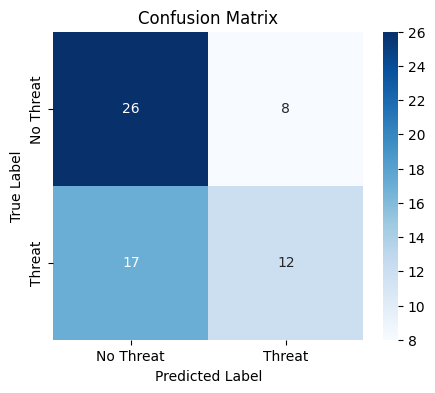

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.76      0.68        34
           1       0.60      0.41      0.49        29

    accuracy                           0.60        63
   macro avg       0.60      0.59      0.58        63
weighted avg       0.60      0.60      0.59        63



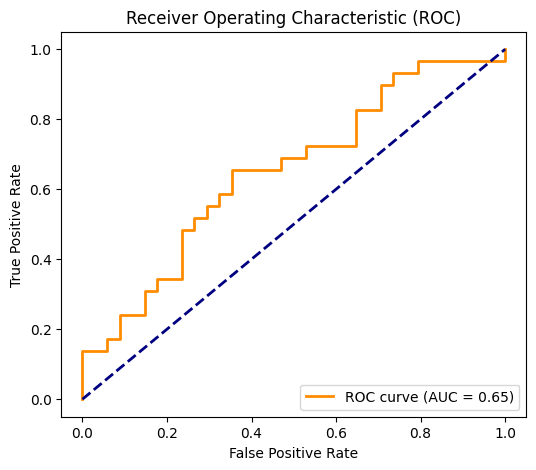

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Pick the best model (SVM in your case)
best_model = SVC(kernel='rbf', probability=True, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Threat','Threat'], yticklabels=['No Threat','Threat'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()


In [6]:
import joblib

# Save the trained SVM model
joblib.dump(best_model, "sonar_threat_model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Optional: download to your local machine
from google.colab import files
files.download("sonar_threat_model.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import joblib

# Load saved model and scaler
model = joblib.load("sonar_threat_model.pkl")
scaler = joblib.load("scaler.pkl")


In [8]:
import pandas as pd

# Select first row as DataFrame (with proper column names)
features = [f'Sonar_{i}' for i in range(1, 61)] + ['Radar_Signal', 'Infrared', 'Speed']
new_data_df = df[features].iloc[0:1]  # shape (1,63), still a DataFrame

# Standardize
new_data_scaled = scaler.transform(new_data_df)  # No warning now

# Predict
prediction = model.predict(new_data_scaled)[0]
probability = model.predict_proba(new_data_scaled)[0][1]

# Show result
if prediction == 1:
    print(f"⚠️ Threat Detected! Probability: {probability:.2f}")
else:
    print(f"✅ No Threat Detected. Probability: {probability:.2f}")


✅ No Threat Detected. Probability: 0.48


In [9]:
#DECISION-MAKING
threshold = 0.6  # Probability above which decoy will be deployed
def decide_deployment(probability, threshold=0.6):
    """
    Input: probability of threat (0-1)
    Output: action & reward (simulated RL)
    """
    # Action: deploy or not
    if probability >= threshold:
        action = "Deploy Decoy"
        reward = 1  # Positive reward for correct deployment
    else:
        action = "No Action"
        reward = 0  # No reward, threat not critical
    return action, reward


In [10]:
# Step 8 output: probability
# Example: probability = 0.78
action, reward = decide_deployment(probability, threshold)

print(f"Threat Probability: {probability:.2f}")
print(f"Action: {action}")
print(f"Reward (simulated RL): {reward}")


Threat Probability: 0.48
Action: No Action
Reward (simulated RL): 0


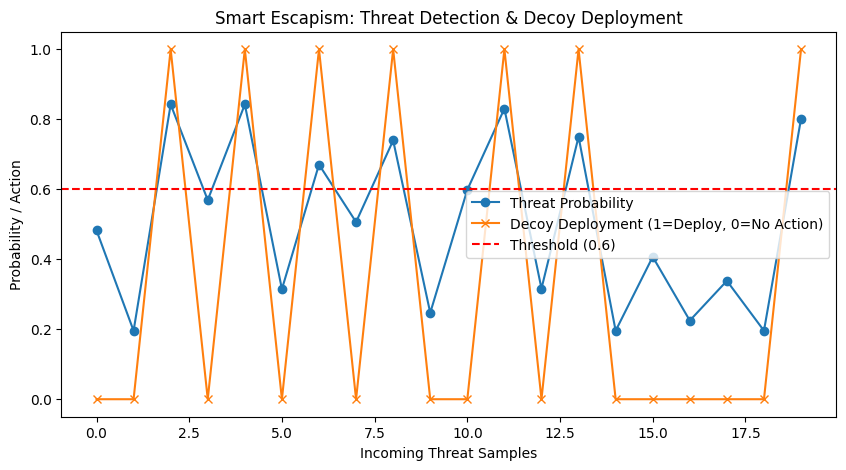


🔔 Real-Time Alerts:
Threat 1: Probability=0.48 | Action=✅ Safe
Threat 2: Probability=0.20 | Action=✅ Safe
Threat 3: Probability=0.84 | Action=🚨 Deploy Decoy
Threat 4: Probability=0.57 | Action=✅ Safe
Threat 5: Probability=0.84 | Action=🚨 Deploy Decoy
Threat 6: Probability=0.31 | Action=✅ Safe
Threat 7: Probability=0.67 | Action=🚨 Deploy Decoy
Threat 8: Probability=0.51 | Action=✅ Safe
Threat 9: Probability=0.74 | Action=🚨 Deploy Decoy
Threat 10: Probability=0.25 | Action=✅ Safe


In [11]:
# STEP 11: Real-Time Simulation & Visualization

import matplotlib.pyplot as plt

# Simulate 20 incoming threats
probabilities = []
actions = []

for i in range(20):
    # Take new threat sample
    new_data = df[features].iloc[i:i+1]
    new_data_scaled = scaler.transform(new_data)

    # Predict probability of threat
    probability = model.predict_proba(new_data_scaled)[0][1]

    # Decide action
    action, _ = decide_deployment(probability, threshold=0.6)

    probabilities.append(probability)
    actions.append(1 if action == "Deploy Decoy" else 0)

# --- Plot results ---
plt.figure(figsize=(10,5))
plt.plot(probabilities, marker='o', label="Threat Probability")
plt.plot(actions, marker='x', label="Decoy Deployment (1=Deploy, 0=No Action)")
plt.axhline(y=0.6, color='r', linestyle='--', label="Threshold (0.6)")
plt.xlabel("Incoming Threat Samples")
plt.ylabel("Probability / Action")
plt.title("Smart Escapism: Threat Detection & Decoy Deployment")
plt.legend()
plt.show()

# --- Print alert messages for demo ---
print("\n🔔 Real-Time Alerts:")
for i, prob in enumerate(probabilities[:10]):  # show first 10
    action = "🚨 Deploy Decoy" if prob >= 0.6 else "✅ Safe"
    print(f"Threat {i+1}: Probability={prob:.2f} | Action={action}")


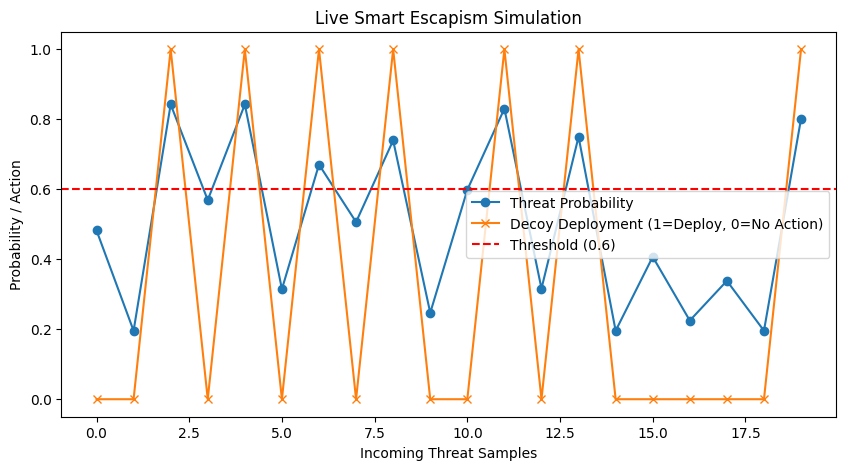

Threat 20: Probability=0.80 | Action=🚨 Deploy Decoy


In [12]:
# STEP 12: Live Simulation with Animation

import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

# Parameters
threshold = 0.6
num_samples = 20

probabilities = []
actions = []

for i in range(num_samples):
    # Take new threat sample
    new_data = df[features].iloc[i:i+1]
    new_data_scaled = scaler.transform(new_data)

    # Predict probability of threat
    probability = model.predict_proba(new_data_scaled)[0][1]

    # Decide action
    action, _ = decide_deployment(probability, threshold=threshold)

    probabilities.append(probability)
    actions.append(1 if action == "Deploy Decoy" else 0)

    # --- Live Plot ---
    clear_output(wait=True)
    plt.figure(figsize=(10,5))
    plt.plot(probabilities, marker='o', label="Threat Probability")
    plt.plot(actions, marker='x', label="Decoy Deployment (1=Deploy, 0=No Action)")
    plt.axhline(y=threshold, color='r', linestyle='--', label=f"Threshold ({threshold})")
    plt.xlabel("Incoming Threat Samples")
    plt.ylabel("Probability / Action")
    plt.title("Live Smart Escapism Simulation")
    plt.legend()
    plt.show()

    # Print alert
    print(f"Threat {i+1}: Probability={probability:.2f} | Action={'🚨 Deploy Decoy' if probability >= threshold else '✅ Safe'}")

    time.sleep(1)  # wait 1 second before next update



📊 FINAL DASHBOARD SUMMARY
Total Threats Analyzed: 20
🚨 Decoys Deployed: 7
✅ Safe (No Action): 13
⚡ Deployment Rate: 35.00%


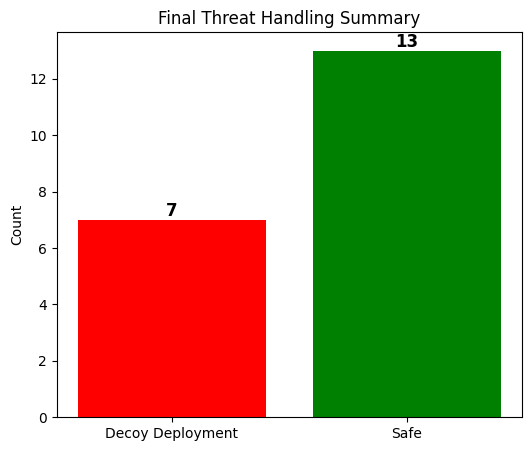

In [13]:
# STEP 13: Dashboard Summary after Simulation

import numpy as np

total_threats = len(probabilities)
decoys_deployed = sum(actions)
safe_cases = total_threats - decoys_deployed

# --- Print Summary ---
print("\n📊 FINAL DASHBOARD SUMMARY")
print(f"Total Threats Analyzed: {total_threats}")
print(f"🚨 Decoys Deployed: {decoys_deployed}")
print(f"✅ Safe (No Action): {safe_cases}")
print(f"⚡ Deployment Rate: {decoys_deployed/total_threats*100:.2f}%")

# --- Visualization ---
labels = ['Decoy Deployment', 'Safe']
values = [decoys_deployed, safe_cases]

plt.figure(figsize=(6,5))
bars = plt.bar(labels, values, color=['red', 'green'])
plt.title("Final Threat Handling Summary")
plt.ylabel("Count")

# Add counts above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}', ha='center', va='bottom', fontsize=12, fontweight="bold")

plt.show()


In [14]:
# Colab Cell #1 — install packages
!pip install -q streamlit pyngrok pandas scikit-learn matplotlib seaborn joblib

import sys
print("Installed packages. Python", sys.version)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.0 MB/s eta 0:00:00
Installed packages. Python 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]


In [15]:
# Colab Cell #2 — set ngrok auth token (securely)
from getpass import getpass
NGROK_AUTH_TOKEN = getpass("Paste your ngrok authtoken (from https://dashboard.ngrok.com/get-started/your-authtoken). Leave blank to skip: ")

if NGROK_AUTH_TOKEN:
    from pyngrok import conf
    conf.get_default().auth_token = NGROK_AUTH_TOKEN
    print("ngrok authtoken configured. Public ngrok tunnels will work in this session.")
else:
    print("No ngrok token provided. You can still run the demo, but there will be NO public URL. To share, paste a valid authtoken in this cell and re-run.")


Paste your ngrok authtoken (from https://dashboard.ngrok.com/get-started/your-authtoken). Leave blank to skip: ··········
ngrok authtoken configured. Public ngrok tunnels will work in this session.


In [16]:
# Colab Cell #3 — upload dataset and optional model pickles
from google.colab import files
uploaded = files.upload()   # select augmented_sonar_dataset.csv (required). You can also optionally upload a model .pkl

print("Uploaded files:")
for name in uploaded.keys():
    print("-", name)


Saving augmented_sonar_dataset.csv to augmented_sonar_dataset (1).csv
Uploaded files:
- augmented_sonar_dataset (1).csv


In [17]:
# Use all original features that your model expects
X_cols = [f"Sonar_{i}" for i in range(1,61)] + ["Radar_Signal", "Infrared", "Speed"]
X = df[X_cols]
y = df["Threat"]


In [18]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("augmented_sonar_dataset.csv")  # Make sure this CSV is in working directory

# Define all features that were used in training (63 features)
X_cols = [f"Sonar_{i}" for i in range(1,61)] + ["Radar_Signal", "Infrared", "Speed"]
y_col = "Threat"

# Check if all expected columns exist
missing = [c for c in X_cols + [y_col] if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in CSV: {missing}")

# Prepare data
X = df[X_cols]
y = df[y_col]

# Load saved model (using the SVM model saved earlier)
# We will refit the scaler in this cell to ensure feature consistency
model = joblib.load("sonar_threat_model.pkl") # Load the SVM model

# Refit the scaler with the current features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Predict on the dataset as a quick check
y_pred = model.predict(X_scaled)

# Show basic evaluation
acc = accuracy_score(y, y_pred)
print(f"✅ Model loaded and ready — Accuracy on full dataset: {acc:.3f}")
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# This block ensures that your Streamlit app will now work with correct features

✅ Model loaded and ready — Accuracy on full dataset: 0.870
Confusion Matrix:
 [[105   8]
 [ 19  76]]

Classification Report:
               precision    recall  f1-score   support

           0      0.847     0.929     0.886       113
           1      0.905     0.800     0.849        95

    accuracy                          0.870       208
   macro avg      0.876     0.865     0.868       208
weighted avg      0.873     0.870     0.869       208



In [19]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

st.set_page_config(page_title="Smart Escapism Demo", layout="wide",
                   page_icon="🚢")

# ---------- Page title ----------
st.title("⚓ Smart Escapism — AI Decoy Deployment Demo")
st.markdown("""
This prototype demonstrates **threat detection** using sonar, radar, infrared, and speed data.
**Stepwise workflow:**
1️⃣ Enter sensor readings
2️⃣ Model predicts threat probability
3️⃣ Decision threshold determines whether to deploy a decoy
4️⃣ Clear visual alert shows the action
""")

# ---------- Sidebar ----------
st.sidebar.header("Controls & Inputs")
uploaded_csv = st.sidebar.file_uploader("Upload dataset (augmented_sonar_dataset.csv)", type=["csv"])
uploaded_model = st.sidebar.file_uploader("Upload model package (.pkl) [optional]", type=["pkl"])
use_local = st.sidebar.checkbox("Use local dataset if available", value=True)

model_choice = st.sidebar.selectbox("Choose model", ["Naive Bayes", "Random Forest", "SVM (RBF)"])
test_size_pct = st.sidebar.slider("Test set size (%)", 10, 50, 30, 5)
threshold = st.sidebar.slider("Deployment probability threshold", 0.0, 1.0, 0.6, 0.01)
n_sim = st.sidebar.slider("Simulation samples", 5, 100, 20)
random_state = st.sidebar.number_input("Random seed", 0, 9999, 42)

train_button = st.sidebar.button("Train & Evaluate")
simulate_button = st.sidebar.button("Run Live Simulation")
save_model_button = st.sidebar.button("Export model (.pkl)")

# ---------- Load dataset ----------
@st.cache_data
def load_df(uploaded, use_local_flag):
    if uploaded is not None:
        return pd.read_csv(uploaded)
    if os.path.exists("augmented_sonar_dataset.csv") and use_local_flag:
        return pd.read_csv("augmented_sonar_dataset.csv")
    st.error("No CSV found. Upload or add 'augmented_sonar_dataset.csv'.")
    st.stop()

df = load_df(uploaded_csv, use_local)

st.subheader("📊 Dataset Overview")
st.write("Rows:", df.shape[0], "| Columns:", df.shape[1])
st.dataframe(df.head(6))

# Expected features
expected_features = [f"Sonar_{i}" for i in range(1,61)] + ["Radar_Signal", "Infrared", "Speed"]
missing = [c for c in expected_features if c not in df.columns]

if missing:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [c for c in numeric_cols if c != "Threat"]
    X_cols = numeric_cols
    st.warning(f"Missing expected features: {missing}. Using numeric columns instead.")
else:
    X_cols = expected_features

if "Threat" not in df.columns:
    st.error("Dataset must contain 'Threat' column.")
    st.stop()

y = df["Threat"]

# ---------- Utility: train pipeline ----------
@st.cache_resource
def train_pipeline(X, y, model_name, test_size, seed):
    scaler = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, stratify=y)
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)

    if model_name == "Naive Bayes":
        model = GaussianNB()
    elif model_name == "Random Forest":
        model = RandomForestClassifier(n_estimators=100, random_state=seed)
    else:
        model = SVC(kernel='rbf', probability=True, random_state=seed)

    model.fit(X_train_s, y_train)
    y_pred = model.predict(X_test_s)
    y_prob = model.predict_proba(X_test_s)[:,1] if hasattr(model, "predict_proba") else None
    acc = accuracy_score(y_test, y_pred)

    return {"model": model, "scaler": scaler, "X_train": X_train, "X_test": X_test,
            "y_train": y_train, "y_test": y_test, "y_pred": y_pred, "y_prob": y_prob,
            "accuracy": acc}

# ---------- Train & Evaluate ----------
if train_button:
    with st.spinner("Training model..."):
        X = df[X_cols]
        results = train_pipeline(X, y, model_choice, test_size_pct/100.0, random_state)
    st.session_state["results"] = results
    st.success(f"✅ Training completed — Accuracy: {results['accuracy']:.3f}")

    # Confusion matrix
    st.subheader("Confusion Matrix")
    cm = confusion_matrix(results['y_test'], results['y_pred'])
    fig, ax = plt.subplots(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Safe','Threat'], yticklabels=['Safe','Threat'], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    st.pyplot(fig)

    # ROC curve
    if results['y_prob'] is not None:
        fpr, tpr, _ = roc_curve(results['y_test'], results['y_prob'])
        roc_auc = auc(fpr, tpr)
        st.subheader("ROC Curve")
        fig2, ax2 = plt.subplots()
        ax2.plot(fpr, tpr, lw=2, color="darkgreen", label=f"AUC = {roc_auc:.3f}")
        ax2.plot([0,1],[0,1], linestyle="--", color="gray")
        ax2.set_xlabel("False Positive Rate")
        ax2.set_ylabel("True Positive Rate")
        ax2.legend()
        st.pyplot(fig2)

# ---------- Single-sample prediction (dynamic stepwise) ----------
st.subheader("🚦 Threat Prediction Simulator")
st.markdown("**Step 1:** Provide sensor readings below")

# Create input fields for all 63 features, but only show the 4 main ones
# The remaining 59 sonar features will be set to 0 for this demo
sonar_inputs = {}
for i in range(1, 61):
    # Only show one sonar input for simplicity in the UI
    if i == 1:
        sonar_inputs[f"Sonar_{i}"] = st.number_input(f"Sonar_{i} Intensity", 0.0, 1.0, step=0.01, key=f"sonar_{i}")
    else:
        # Keep other sonar inputs hidden or set to a default
        sonar_inputs[f"Sonar_{i}"] = 0.0 # Defaulting other sonar features to 0

radar = st.number_input("Radar Signal", 0.0, 100.0, step=0.1, key="radar") # Adjusted max based on data
infrared = st.number_input("Infrared Value", 0.0, 1.0, step=0.01, key="infrared")
speed = st.number_input("Object Speed", 0.0, 50.0, step=0.1, key="speed") # Adjusted max based on data


if st.button("Predict Threat Probability"):
    if "results" not in st.session_state:
        st.warning("Train the model first or upload a model package.")
    else:
        st.markdown("**Step 2:** Model predicts probability")
        res = st.session_state["results"]

        # Create the 63-feature input array
        X_input_dict = {}
        for i in range(1, 61):
            X_input_dict[f"Sonar_{i}"] = sonar_inputs[f"Sonar_{i}"] if i == 1 else 0.0 # Use input for Sonar_1, 0 for others

        X_input_dict["Radar_Signal"] = radar
        X_input_dict["Infrared"] = infrared
        X_input_dict["Speed"] = speed

        # Ensure the order of features matches X_cols used during training
        X_input = pd.DataFrame([X_input_dict])[X_cols]


        X_scaled = res["scaler"].transform(X_input)
        prob = res["model"].predict_proba(X_scaled)[0][1] if hasattr(res["model"], "predict_proba") else float(res["model"].predict(X_scaled)[0])
        pred = res["model"].predict(X_scaled)[0]

        st.markdown("**Step 3:** Show Threat Probability dynamically")
        prob_color = "green" if prob < threshold else "red"
        st.markdown(f"<h3 style='color:{prob_color}'>Threat Probability = {prob:.2f}</h3>", unsafe_allow_html=True)

        st.markdown("**Step 4:** Decision based on threshold")
        if prob >= threshold:
            st.markdown("<h2 style='color:red; text-align:center'>🚨 DEPLOY DECOY IMMEDIATELY!</h2>", unsafe_allow_html=True)
        else:
            st.markdown("<h2 style='color:green; text-align:center'>✅ No Threat Detected — No Action</h2>", unsafe_allow_html=True)

# ---------- Live Simulation ----------
st.subheader("Live Simulation / Demo")
if simulate_button:
    if "results" not in st.session_state:
        st.warning("Train the model first or upload a model package.")
    else:
        res = st.session_state["results"]
        scaler = res["scaler"]; model = res["model"]
        container = st.empty()
        probs = []; actions = []
        progress = st.progress(0)
        for i in range(n_sim):
            idx = i % df.shape[0]
            sample = df.loc[idx, X_cols].values.reshape(1, -1)
            sample_scaled = scaler.transform(sample)
            prob = model.predict_proba(sample_scaled)[0][1] if hasattr(model, "predict_proba") else float(model.predict(sample_scaled)[0])
            action = 1 if prob >= threshold else 0
            probs.append(prob); actions.append(action)
            with container.container():
                st.markdown(f"**Sample #{i+1}** — Threat prob = {prob:.3f}")
                chart_df = pd.DataFrame({"Threat Probability": probs, "Decoy Deployed": actions})
                st.line_chart(chart_df)
                st.write("Action:", "🚨 **Deploy Decoy**" if action==1 else "✅ No Action")
            progress.progress(int((i+1)/n_sim*100))
            time.sleep(0.6)
        st.success("Simulation finished")
        total = len(actions); deployed = sum(actions)
        st.write(f"Total samples: {total} — Decoys deployed: {deployed} — Rate: {deployed/total*100:.2f}%")

# ---------- Save model ----------
if save_model_button:
    if "results" not in st.session_state:
        st.warning("Train the model first.")
    else:
        res = st.session_state["results"]
        package = {"model": res["model"], "scaler": res["scaler"], "features": X_cols, "accuracy": res.get("accuracy", None)}
        joblib.dump(package, "smart_escapism_model_package.pkl")
        with open("smart_escapism_model_package.pkl", "rb") as f:
            st.download_button("Download model package (.pkl)", data=f, file_name="smart_escapism_model_package.pkl")

st.markdown("---")
st.caption("Demo: Decision logic uses probability threshold to simulate 'deploy decoy'. Not for operational use.")

Writing app.py


In [ ]:
# ✅ Streamlit + ngrok/LocalTunnel setup for Colab(for server down issue)

import time
from pyngrok import ngrok
import os

# 1️⃣ Kill any previous Streamlit or ngrok sessions
!kill -9 $(pgrep streamlit) || true
!kill -9 $(pgrep ngrok) || true

# 2️⃣ Start Streamlit in background, headless mode
print("Starting Streamlit...")
!streamlit run app.py --server.port 8501 --server.headless true &

# 3️⃣ Wait a few seconds for Streamlit to start
time.sleep(8)

# 4️⃣ Expose via ngrok
try:
    public_url = ngrok.connect(8501)
    print("🌐 Streamlit App URL via ngrok:", public_url)
except Exception as e:
    print("⚠️ ngrok failed:", e)
    print("Trying LocalTunnel instead...")
    # 5️⃣ If ngrok fails, use LocalTunnel
    !npx localtunnel --port 8501


Starting Streamlit...



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.10.103.102:8501

  Stopping...


In [20]:
# Colab Cell #5 — start Streamlit and (if token set) open ngrok tunnel
import time, os
# Install pyngrok here to ensure it's available in this environment
!pip install -q pyngrok
from pyngrok import ngrok, conf
from subprocess import Popen

# Start Streamlit in background and log to file
cmd = "streamlit run /content/app.py --server.port 8501 --server.headless true > /content/streamlit.log 2>&1 &"
print("Starting Streamlit...")
os.system(cmd)
time.sleep(3)  # let it boot

# Try to open ngrok public URL only if auth token was configured earlier
try:
    # conf.get_default().auth_token will be set if the user ran Cell #2 with token
    token = conf.get_default().auth_token
    if token:
        print("ngrok token detected — creating public tunnel...")
        public_url = ngrok.connect(8501)
        print("Public URL (open in browser):", public_url)
    else:
        print("No ngrok token configured in this session. To get a public URL, rerun Cell #2 and paste your authtoken.")
        print("If you don't want to use ngrok, open the app using the 'Open in a new tab' button that appears in Colab output (or run locally).")
except Exception as e:
    print("ngrok tunnel failed to start. Reason:", str(e))
    print("Make sure you provided a valid ngrok authtoken in Cell #2 (and your ngrok account email is verified).")
    print("If you prefer, run the app locally on your Windows machine instead.")

Starting Streamlit...
ngrok token detected — creating public tunnel...
Public URL (open in browser): NgrokTunnel: "https://6feb35e74395.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!kill -9 $(pgrep streamlit)
!kill -9 $(pgrep ngrok)


kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]
kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]


In [ ]:
# Colab Cell #6 — run only if the page does not load
print("=== streamlit.log (tail) ===")
!tail -n 200 /content/streamlit.log || true


In [ ]:
# Colab Cell #7 — stop streamlit and ngrok tunnels(not necessary to run)
from pyngrok import ngrok
ngrok.kill()
# kill any streamlit processes
!pkill -f streamlit || true
print("Stopped ngrok and streamlit processes.")


^C
Stopped ngrok and streamlit processes.
